Statisical Modeling

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from src.data_quality_checks import check_missing_data
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Loading historical data
file_path = "../data/MachineLearningRating_v3.txt"

df = pd.read_csv(file_path, sep='|', low_memory=False)

In [3]:
df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [4]:
# selecting relevant columns
relevant_cols = ['TotalPremium', 'TotalClaims', 'Gender', 'PostalCode', 'Province', 'VehicleType', 'RegistrationYear', 'NewVehicle']

df_relevant_cols = df[relevant_cols]

In [5]:
df_relevant_cols

,TotalPremium,TotalClaims,Gender,PostalCode,Province,VehicleType,RegistrationYear,NewVehicle
0,21.929825,0.0,Not specified,1459,Gauteng,Passenger Vehicle,2004,More than 6 months
1,21.929825,0.0,Not specified,1459,Gauteng,Passenger Vehicle,2004,More than 6 months
2,0.000000,0.0,Not specified,1459,Gauteng,Passenger Vehicle,2004,More than 6 months
3,512.848070,0.0,Not specified,1459,Gauteng,Passenger Vehicle,2004,More than 6 months
4,0.000000,0.0,Not specified,1459,Gauteng,Passenger Vehicle,2004,More than 6 months
...,...,...,...,...,...,...,...,...
1000093,347.235175,0.0,Male,7493,Western Cape,Passenger Vehicle,2013,More than 6 months
1000094,347.235175,0.0,Male,7493,Western Cape,Passenger Vehicle,2013,More than 6 months
1000095,347.235175,0.0,Male,7493,Western Cape,Passenger Vehicle,2013,More than 6 months
1000096,2.315000,0.0,Male,7493,Western Cape,Passenger Vehicle,2013,More than 6 months


In [7]:
# checking for columns with missing values
missing_data = check_missing_data(df_relevant_cols)
print(missing_data)

   Column Name  Missing Values  Percentage Missing
2       Gender            9536            0.953507
5  VehicleType             552            0.055195
7   NewVehicle          153295           15.327998


In [8]:
# data cleaning
df_relevant_cols.loc[:, 'VehicleType'] = df_relevant_cols['VehicleType'].fillna(df_relevant_cols['VehicleType'].mode()[0])
df_relevant_cols.loc[:, 'NewVehicle'] = df_relevant_cols['NewVehicle'].fillna(df_relevant_cols['NewVehicle'].mode()[0])
df_relevant_cols.loc[:, 'Gender'] = df_relevant_cols['Gender'].fillna(df_relevant_cols['Gender'].mode()[0])

In [9]:
# checking for columns with missing values
missing_data = check_missing_data(df_relevant_cols)
print(missing_data)

Success: No missing values.


In [10]:
df_relevant_cols.head(10)

,TotalPremium,TotalClaims,Gender,PostalCode,Province,VehicleType,RegistrationYear,NewVehicle
0,21.929825,0.0,Not specified,1459,Gauteng,Passenger Vehicle,2004,More than 6 months
1,21.929825,0.0,Not specified,1459,Gauteng,Passenger Vehicle,2004,More than 6 months
2,0.000000,0.0,Not specified,1459,Gauteng,Passenger Vehicle,2004,More than 6 months
3,512.848070,0.0,Not specified,1459,Gauteng,Passenger Vehicle,2004,More than 6 months
4,0.000000,0.0,Not specified,1459,Gauteng,Passenger Vehicle,2004,More than 6 months
5,3.256435,0.0,Not specified,1459,Gauteng,Passenger Vehicle,2004,More than 6 months
6,50.474737,0.0,Not specified,1459,Gauteng,Passenger Vehicle,2004,More than 6 months
7,35.332316,0.0,Not specified,1459,Gauteng,Passenger Vehicle,2004,More than 6 months
8,0.000000,0.0,Not specified,1459,Gauteng,Passenger Vehicle,2004,More than 6 months
9,1.009474,0.0,Not specified,1459,Gauteng,Passenger Vehicle,2004,More than 6 months


In [11]:
# Encoding categorical data
categorical_features = ['Province', 'PostalCode', 'Gender', 'VehicleType', 'RegistrationYear', 'NewVehicle']
encoder = LabelEncoder()

for feature in categorical_features:
    df_relevant_cols[feature] = encoder.fit_transform(df_relevant_cols[feature])

C:\Users\meet_\AppData\Local\Temp\ipykernel_9872\1768762645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant_cols[feature] = encoder.fit_transform(df_relevant_cols[feature])
C:\Users\meet_\AppData\Local\Temp\ipykernel_9872\1768762645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant_cols[feature] = encoder.fit_transform(df_relevant_cols[feature])
C:\Users\meet_\AppData\Local\Temp\ipykernel_9872\1768762645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [12]:
df_relevant_cols.head(10)

,TotalPremium,TotalClaims,Gender,PostalCode,Province,VehicleType,RegistrationYear,NewVehicle
0,21.929825,0.0,2,261,2,4,13,1
1,21.929825,0.0,2,261,2,4,13,1
2,0.000000,0.0,2,261,2,4,13,1
3,512.848070,0.0,2,261,2,4,13,1
4,0.000000,0.0,2,261,2,4,13,1
5,3.256435,0.0,2,261,2,4,13,1
6,50.474737,0.0,2,261,2,4,13,1
7,35.332316,0.0,2,261,2,4,13,1
8,0.000000,0.0,2,261,2,4,13,1
9,1.009474,0.0,2,261,2,4,13,1


In [13]:
# Split data into features and target variable, and predict TotalClaims
X = df_relevant_cols.drop(['TotalClaims', 'TotalPremium'], axis=1)
y = df_relevant_cols['TotalClaims']  

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Building using Linear Regression


In [15]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

Decicion tree

In [16]:
# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

Random forest

In [17]:
# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

Model Evaluation

In [19]:
# Evaluate each model
metrics_lr = evaluate_model(y_test, y_pred_lr)
metrics_dt = evaluate_model(y_test, y_pred_dt)
metrics_rf = evaluate_model(y_test, y_pred_rf)

print(f'Linear Regression: MAE={metrics_lr[0]}, MSE={metrics_lr[1]}, RMSE={metrics_lr[2]}, R²={metrics_lr[3]}')
print(f'Decision Tree: MAE={metrics_dt[0]}, MSE={metrics_dt[1]}, RMSE={metrics_dt[2]}, R²={metrics_dt[3]}')
print(f'Random Forest: MAE={metrics_rf[0]}, MSE={metrics_rf[1]}, RMSE={metrics_rf[2]}, R²={metrics_rf[3]}')

Linear Regression: MAE=129.7813507781327, MSE=4886080.188676738, RMSE=2210.447961087693, R²=6.280666758573528e-05
Decision Tree: MAE=129.06420618037762, MSE=4907972.824057604, RMSE=2215.3945075443344, R²=-0.004417525118234122
Random Forest: MAE=128.6475483446711, MSE=4908052.174972609, RMSE=2215.412416452659, R²=-0.00443376429732556


In [18]:
# Function to evaluate models
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

Feature Importance Analysis

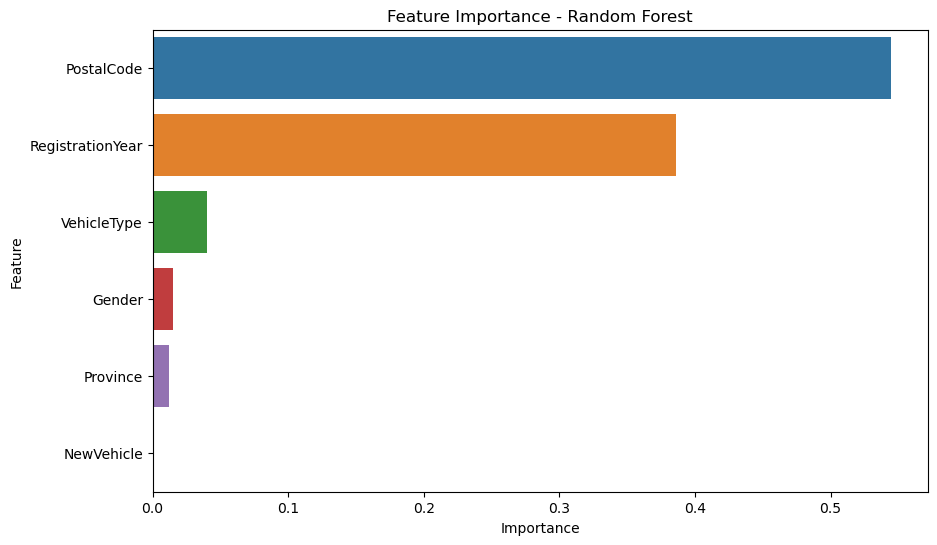

In [20]:
# Feature importance for Random Forest
importances_rf = rf_model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances_rf})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()

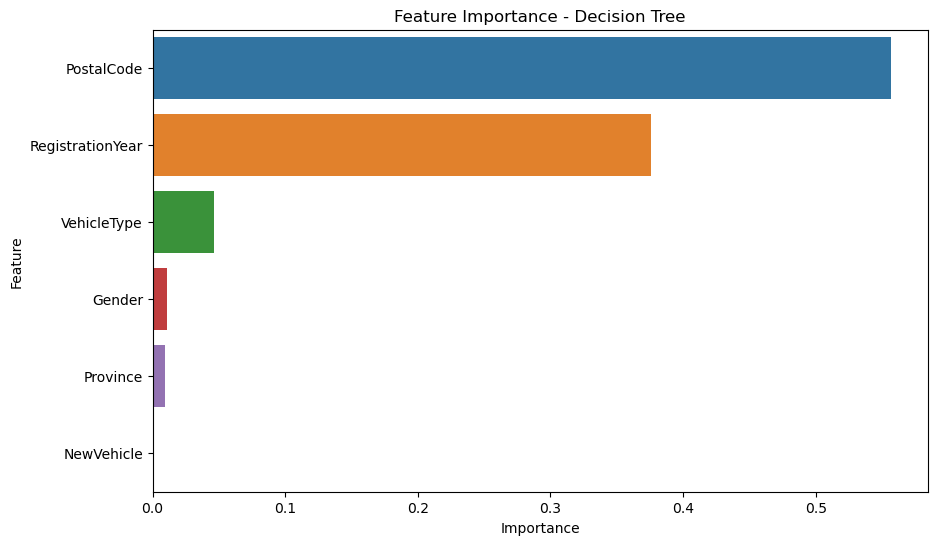

In [21]:
# Feature importance for Decision Tree
importances_rf = dt_model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances_rf})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Decision Tree')
plt.show()

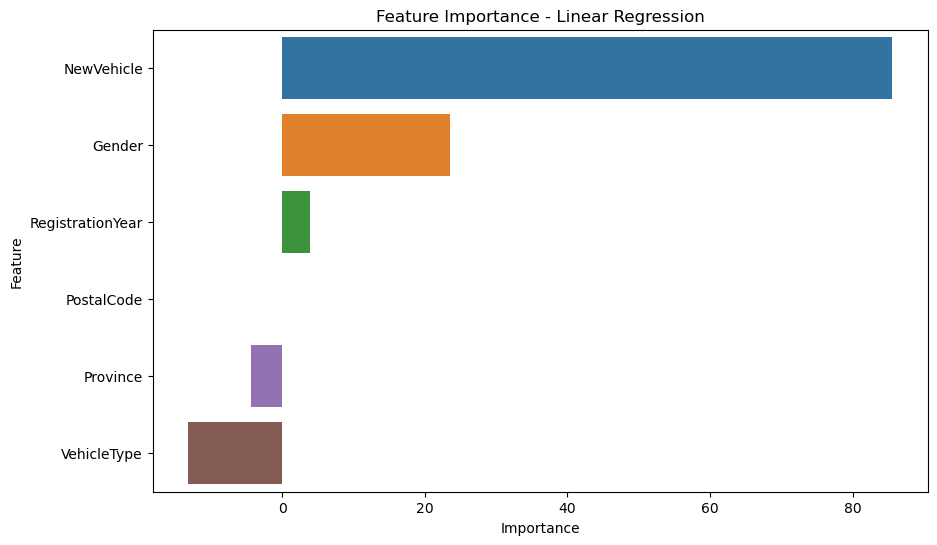

In [22]:
# Feature importance for Linear Regression
importances_rf = lr_model.coef_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances_rf})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Linear Regression')
plt.show()